[0]	validation-rmse:0.31677
[1]	validation-rmse:0.31567
[2]	validation-rmse:0.31164
[3]	validation-rmse:0.31661
[4]	validation-rmse:0.31981
[5]	validation-rmse:0.31745
[6]	validation-rmse:0.31660
[7]	validation-rmse:0.31489
[8]	validation-rmse:0.31454
[9]	validation-rmse:0.31311
[10]	validation-rmse:0.31747
[11]	validation-rmse:0.32170
[12]	validation-rmse:0.32580


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:25:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Mean Squared Error: 0.031431848336362304
Testing Mean Squared Error: 0.11154501479713709
Training Mean Absolute Error: 0.14404010348849827
Testing Mean Absolute Error: 0.2660386987527212


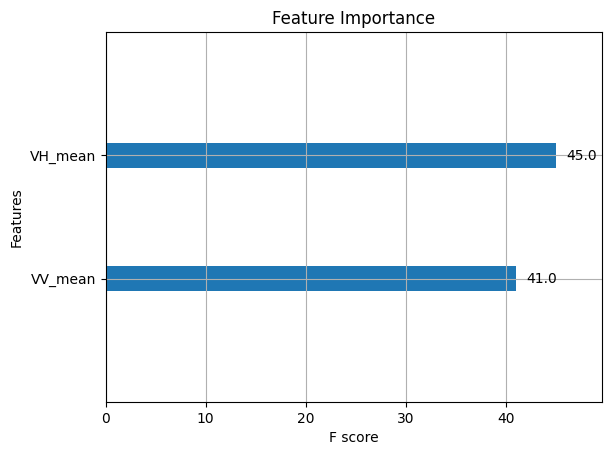

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/File.csv')

# Preprocess the data
# Keep only the VV and VH columns as features
X = data[['VV_mean', 'VH_mean']]
y = data['LAI']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
test_predictions = model.predict(dtest)

# Calculate training and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error: {train_mse}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Testing Mean Absolute Error: {test_mae}')

# Visualize feature importance
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()


In [ ]:
# prompt: algorithm that predicts LAI on the basis of VV and VH. Train the model and also test and validate it

import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/File.csv')

# Preprocess the data
# Keep only the VV and VH columns as features
X = data[['VV_mean', 'VH_mean']]
y = data['LAI']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error: {train_mse}')
print(f'Validation Mean Squared Error: {valid_mse}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Validation Mean Absolute Error: {valid_mae}')
print(f'Testing Mean Absolute Error: {test_mae}')

[0]	validation-rmse:0.31677


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:52:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:0.31567
[2]	validation-rmse:0.31164
[3]	validation-rmse:0.31661
[4]	validation-rmse:0.31981
[5]	validation-rmse:0.31745
[6]	validation-rmse:0.31660
[7]	validation-rmse:0.31489
[8]	validation-rmse:0.31454
[9]	validation-rmse:0.31311
[10]	validation-rmse:0.31747
[11]	validation-rmse:0.32170
[12]	validation-rmse:0.32580
Training Mean Squared Error: 0.031431848336362304
Validation Mean Squared Error: 0.10614356050953094
Testing Mean Squared Error: 0.11154501479713709
Training Mean Absolute Error: 0.14404010348849827
Validation Mean Absolute Error: 0.25830315311749774
Testing Mean Absolute Error: 0.2660386987527212


In [ ]:
# prompt: try another algorithm

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('/content/File.csv')

# Preprocess the data
# Keep only the VV and VH columns as features
X = data[['VV_mean', 'VH_mean']]
y = data['LAI']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')

# You can also analyze feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")


Training Mean Squared Error (Random Forest): 0.012425486805555533
Validation Mean Squared Error (Random Forest): 0.14210521750000024
Testing Mean Squared Error (Random Forest): 0.11528069833333358
Training Mean Absolute Error (Random Forest): 0.09340833333333329
Validation Mean Absolute Error (Random Forest): 0.30848333333333355
Testing Mean Absolute Error (Random Forest): 0.27518333333333383
VV_mean: 0.48421731653708755
VH_mean: 0.5157826834629125


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - loss: 0.9279 - mae: 0.9204 - val_loss: 0.1520 - val_mae: 0.3256
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1160 - mae: 0.2821 - val_loss: 0.2451 - val_mae: 0.3960
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2015 - mae: 0.3690 - val_loss: 0.2911 - val_mae: 0.4361
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.2455 - mae: 0.4251 - val_loss: 0.1703 - val_mae: 0.3212
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.1150 - mae: 0.2671 - val_loss: 0.1238 - val_mae: 0.2834
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.0703 - mae: 0.2253 - val_loss: 0.1836 - val_mae: 0.3553
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.1453 - mae: 0.3203 - val_loss: 0.2519 - val_mae: 0.4287
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2035 - mae: 0.3863 - val_loss: 0.2131 - val_mae: 0.3828
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1648 - m

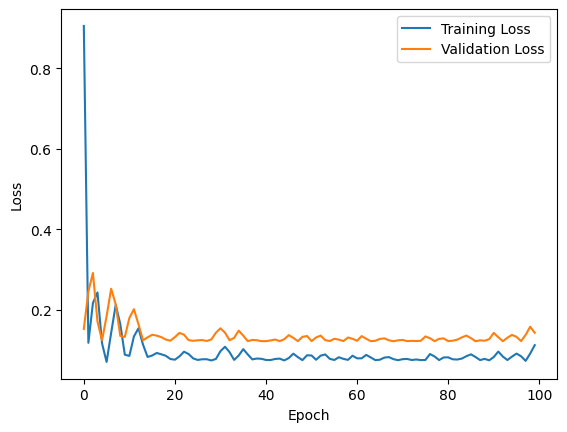

In [ ]:
# prompt: use ANN

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
data = pd.read_csv('/content/File.csv')

# Preprocess the data
# Keep only the VV and VH columns as features
X = data[['VV_mean', 'VH_mean']]
y = data['LAI']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# prompt: try using svm

import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.svm import SVR

# Load the dataset
data = pd.read_csv('/content/File.csv')

# Preprocess the data
# Keep only the VV and VH columns as features
X = data[['VV_mean', 'VH_mean']]
y = data['LAI']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')

Training Mean Squared Error (SVM): 0.06755406297155214
Validation Mean Squared Error (SVM): 0.10429861300330619
Testing Mean Squared Error (SVM): 0.09890588452525316
Training Mean Absolute Error (SVM): 0.21541319319264385
Validation Mean Absolute Error (SVM): 0.24411527670286293
Testing Mean Absolute Error (SVM): 0.2602112006365664


In [ ]:
data.head()

,LAI,Plant_heig,DBH_m_,canopy_rad,canopy_cir,ndvi2023_mean,ndre2023_mean,lswi2023_mean,Evi2023_mean,VV_mean,...,LAI.1,Evi2023_mean.1,Unnamed: 37,LAI.2,Evi2023_mean.2,LAI.3,fdc,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.660,3.40,0.8,3.5,30.0,0.472324,0.379955,0.292221,6.562868,-11.313682,...,1.66,6.562868,NaN,1.66,2.90000,0.800,1.60,0.029559,NaN,0.059118
1,1.000,0.00,0.0,0.0,22.0,0.339296,0.246918,0.168713,-9.171651,-8.771105,...,NaN,NaN,NaN,NaN,NaN,1.030,2.06,0.126633,NaN,0.253265
2,1.370,6.00,0.6,3.6,22.0,0.431640,0.333228,0.239454,9.557211,-10.699364,...,1.37,9.557211,NaN,1.37,3.00000,1.135,2.27,0.157004,NaN,0.314007
3,1.130,4.31,0.7,3.7,12.0,0.401281,0.301087,0.200579,9.366930,-10.368002,...,1.13,9.366930,NaN,1.13,9.36693,1.170,2.34,0.182322,NaN,0.364643
4,1.275,10.00,4.2,0.0,34.0,0.354280,0.265736,0.178864,35.265920,-9.046082,...,NaN,NaN,NaN,NaN,NaN,1.200,2.40,0.190620,NaN,0.381241


In [ ]:
# prompt: provide the same code to predict LAI with input variables ndvi and ndre from the file

import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.svm import SVR

# Load the dataset
data = pd.read_csv('/content/File.csv')

# Preprocess the data
# Keep only the ndvi and ndre columns as features
X = data[['ndvi2023_mean', 'ndre2023_mean']]
y = data['LAI']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost
# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (XGBoost): {test_mae}')


# Random Forest
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')


# ANN
# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# SVM
# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')


In [ ]:
X = data[['VV_mean', 'VH_mean']]
y = data['DBH_m_']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost
# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (XGBoost): {test_mae}')


# Random Forest
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')


# ANN
# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# SVM
# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')

[0]	validation-rmse:1.88149
[1]	validation-rmse:1.88398
[2]	validation-rmse:1.87340
[3]	validation-rmse:1.87034
[4]	validation-rmse:1.86956
[5]	validation-rmse:1.91533
[6]	validation-rmse:1.89850
[7]	validation-rmse:1.87041
[8]	validation-rmse:1.85601
[9]	validation-rmse:1.83150
[10]	validation-rmse:1.86399
[11]	validation-rmse:1.86149
[12]	validation-rmse:1.85003
[13]	validation-rmse:1.82947
[14]	validation-rmse:1.85797
[15]	validation-rmse:1.86801
[16]	validation-rmse:1.86476
[17]	validation-rmse:1.88963
[18]	validation-rmse:1.90252
[19]	validation-rmse:1.90581
[20]	validation-rmse:1.90957
[21]	validation-rmse:1.91849
[22]	validation-rmse:1.91659


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:27:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Mean Squared Error (XGBoost): 0.6336688611474042
Validation Mean Squared Error (XGBoost): 3.6754689789448354
Testing Mean Squared Error (XGBoost): 3.3383812252223692
Training Mean Absolute Error (XGBoost): 0.6264812529087068
Validation Mean Absolute Error (XGBoost): 1.4730230808258058
Testing Mean Absolute Error (XGBoost): 1.5229980568091073
Training Mean Squared Error (Random Forest): 0.30094719444444484
Validation Mean Squared Error (Random Forest): 4.57434225
Testing Mean Squared Error (Random Forest): 3.0131444166666674
Training Mean Absolute Error (Random Forest): 0.45108333333333367
Validation Mean Absolute Error (Random Forest): 1.632083333333333
Testing Mean Absolute Error (Random Forest): 1.4624166666666667


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - loss: 4.4656 - mae: 1.8130 - val_loss: 3.4664 - val_mae: 1.4453
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.0420 - mae: 1.5293 - val_loss: 3.0493 - val_mae: 1.3062
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.5833 - mae: 1.4987 - val_loss: 3.0747 - val_mae: 1.3193
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.5225 - mae: 1.4593 - val_loss: 3.0568 - val_mae: 1.2918
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.0628 - mae: 1.4258 - val_loss: 3.4541 - val_mae: 1.4402
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.0313 - mae: 1.5265 - val_loss: 3.9888 - val_mae: 1.6084
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0268 - mae: 1.5394 - val_loss: 3.9003 - val_mae: 1.5855
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.0718 - mae: 1.5558 - val_loss: 3.7176 - val_mae: 1.5343
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0342 - mae:

In [ ]:
X = data[['VH_mean', 'Plant_heig']]
y = data['DBH_m_']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost
# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (XGBoost): {test_mae}')


# Random Forest
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')

# ANN
# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# SVM
# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')

[0]	validation-rmse:1.87181
[1]	validation-rmse:1.86367
[2]	validation-rmse:1.85231
[3]	validation-rmse:1.84382
[4]	validation-rmse:1.83544
[5]	validation-rmse:1.84321
[6]	validation-rmse:1.83847
[7]	validation-rmse:1.87503
[8]	validation-rmse:1.87209
[9]	validation-rmse:1.90624
[10]	validation-rmse:1.93907
[11]	validation-rmse:1.94615
[12]	validation-rmse:1.97067
[13]	validation-rmse:1.99652


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:32:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Mean Squared Error (XGBoost): 0.7167571865685648
Validation Mean Squared Error (XGBoost): 3.9638295138546247
Testing Mean Squared Error (XGBoost): 3.6749045591640197
Training Mean Absolute Error (XGBoost): 0.6886052714453803
Validation Mean Absolute Error (XGBoost): 1.3460787256558737
Testing Mean Absolute Error (XGBoost): 1.3648296395937602
Training Mean Squared Error (Random Forest): 0.23965083333333365
Validation Mean Squared Error (Random Forest): 3.5988265000000044
Testing Mean Squared Error (Random Forest): 3.9741699999999986
Training Mean Absolute Error (Random Forest): 0.3889444444444446
Validation Mean Absolute Error (Random Forest): 1.3280000000000003
Testing Mean Absolute Error (Random Forest): 1.3558333333333337
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step - loss: 6.0965 - mae: 2.1681 - val_loss: 6.2732 - val_mae: 2.0569
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 4.0124 - mae: 1.7089 - val_loss: 4.6521 - val_mae: 1.6252
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.7219 - mae: 1.3800 - val_loss: 3.7653 - val_mae: 1.4391
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 2.0976 - mae: 1.1970 - val_loss: 3.2311 - val_mae: 1.3167
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.8256 - mae: 1.0753 - val_loss: 2.9762 - val_mae: 1.3005
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.8218 - mae: 1.0644 - val_loss: 2.9213 - val_mae: 1.2984
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.9989 - mae: 1.0870 - val_loss: 2.9845 - val_mae: 1.3280
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 2.1991 - mae: 1.1411 - val_loss: 3.0315 - val_mae: 1.3498
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.0275 - mae: 1.1040 - va

In [ ]:
X = data[['VH_mean', 'Plant_heig']]
y = data['DBH_m_']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost
# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (XGBoost): {test_mae}')


# Random Forest
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')


# ANN
# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# SVM
# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')

[0]	validation-rmse:1.87181
[1]	validation-rmse:1.86367
[2]	validation-rmse:1.85231
[3]	validation-rmse:1.84382
[4]	validation-rmse:1.83544
[5]	validation-rmse:1.84321
[6]	validation-rmse:1.83847
[7]	validation-rmse:1.87503
[8]	validation-rmse:1.87209
[9]	validation-rmse:1.90624
[10]	validation-rmse:1.93907
[11]	validation-rmse:1.94615
[12]	validation-rmse:1.97067
[13]	validation-rmse:1.99652
[14]	validation-rmse:1.99094


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:44:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Mean Squared Error (XGBoost): 0.7167571865685648
Validation Mean Squared Error (XGBoost): 3.9638295138546247
Testing Mean Squared Error (XGBoost): 3.6749045591640197
Training Mean Absolute Error (XGBoost): 0.6886052714453803
Validation Mean Absolute Error (XGBoost): 1.3460787256558737
Testing Mean Absolute Error (XGBoost): 1.3648296395937602
Training Mean Squared Error (Random Forest): 0.23965083333333365
Validation Mean Squared Error (Random Forest): 3.5988265000000044
Testing Mean Squared Error (Random Forest): 3.9741699999999986
Training Mean Absolute Error (Random Forest): 0.3889444444444446
Validation Mean Absolute Error (Random Forest): 1.3280000000000003
Testing Mean Absolute Error (Random Forest): 1.3558333333333337
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - loss: 2.2141 - mae: 1.2606 - val_loss: 3.2433 - val_mae: 1.3320
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.8380 - mae: 1.1070 - val_loss: 3.2200 - val_mae: 1.3116
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.6961 - mae: 1.0222 - val_loss: 3.0635 - val_mae: 1.3009
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.7231 - mae: 1.0042 - val_loss: 2.9949 - val_mae: 1.2924
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.7288 - mae: 0.9546 - val_loss: 2.9884 - val_mae: 1.2841
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.7417 - mae: 0.9466 - val_loss: 2.9870 - val_mae: 1.2782
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 1.7202 - mae: 0.9154 - val_loss: 3.0039 - val_mae: 1.2742
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 1.7706 - mae: 0.9337 - val_loss: 3.0635 - val_mae: 1.2729
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.6657 - mae: 0.8952 - 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Training Mean Squared Error (ANN): 1.5451841021771018
Validation Mean Squared Error (ANN): 3.1483331416365616
Testing Mean Squared Error (ANN): 3.52187316494077
Training Mean Absolute Error (ANN): 0.9013758826586934
Validation Mean Absolute Error (ANN): 1.2926459431648256
Testing Mean Absolute Error (ANN): 1.2820663213729857
Training Mean Squared Error (SVM): 1.7559782439466878
Validation Mean Squared Error (SVM): 3.1098024086275533
Testing Mean Squared Error (SVM): 3.3109083736444997
Training Mean Absolute Error (SVM): 1.0642497027640883
Validation Mean Absolute Error (SVM): 1.3089101302367236
Testing Mean Absolute Error (SVM): 1.3528309083567283


In [ ]:
X = data[['VV_mean', 'VH_mean']]
y = data['Plant_heig']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost
# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (XGBoost): {test_mae}')


# Random Forest
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')


# ANN
# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# SVM
# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')

[0]	validation-rmse:2.28612
[1]	validation-rmse:2.26851
[2]	validation-rmse:2.23701
[3]	validation-rmse:2.23113
[4]	validation-rmse:2.23733
[5]	validation-rmse:2.24740
[6]	validation-rmse:2.31115
[7]	validation-rmse:2.35258
[8]	validation-rmse:2.42076
[9]	validation-rmse:2.47334
[10]	validation-rmse:2.50627
[11]	validation-rmse:2.52546
[12]	validation-rmse:2.54399
[13]	validation-rmse:2.61133


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:47:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Mean Squared Error (XGBoost): 4.1707470238104305
Validation Mean Squared Error (XGBoost): 6.8190313455903455
Testing Mean Squared Error (XGBoost): 10.920511148948629
Training Mean Absolute Error (XGBoost): 1.536516174475352
Validation Mean Absolute Error (XGBoost): 1.8543668540318807
Testing Mean Absolute Error (XGBoost): 2.9124638795852658
Training Mean Squared Error (Random Forest): 1.6840787883333326
Validation Mean Squared Error (Random Forest): 6.061162555000016
Testing Mean Squared Error (Random Forest): 13.119381085833338
Training Mean Absolute Error (Random Forest): 0.9813888888888899
Validation Mean Absolute Error (Random Forest): 2.0124333333333366
Testing Mean Absolute Error (Random Forest): 3.1502416666666666
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - loss: 74.1863 - mae: 8.0501 - val_loss: 65.1176 - val_mae: 7.7459
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 59.7183 - mae: 7.1996 - val_loss: 51.0696 - val_mae: 6.7769
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 45.6410 - mae: 6.2401 - val_loss: 38.9684 - val_mae: 5.8139
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 37.1019 - mae: 5.5607 - val_loss: 29.1776 - val_mae: 4.8974
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 27.6019 - mae: 4.7183 - val_loss: 21.4034 - val_mae: 4.0229
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 21.1403 - mae: 4.0404 - val_loss: 15.4054 - val_mae: 3.2435
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 16.1757 - mae: 3.4600 - val_loss: 11.0451 - val_mae: 2.6937
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.1271 - mae: 3.0705 - val_loss: 8.2913 - val_mae: 2.2587
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.3930 - 

In [ ]:
X = data[['VH_mean', 'DBH_m_']]
y = data['Plant_heig']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost
# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (XGBoost): {test_mae}')


# Random Forest
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')


# ANN
# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# SVM
# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')

[0]	validation-rmse:2.27947
[1]	validation-rmse:2.26768
[2]	validation-rmse:2.22843
[3]	validation-rmse:2.23238
[4]	validation-rmse:2.22521
[5]	validation-rmse:2.21944
[6]	validation-rmse:2.24910
[7]	validation-rmse:2.26200
[8]	validation-rmse:2.27476
[9]	validation-rmse:2.29120
[10]	validation-rmse:2.29498
[11]	validation-rmse:2.29144
[12]	validation-rmse:2.28905
[13]	validation-rmse:2.28301
[14]	validation-rmse:2.28354
[15]	validation-rmse:2.30539


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:53:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Mean Squared Error (XGBoost): 2.691337443918263
Validation Mean Squared Error (XGBoost): 5.314822593031019
Testing Mean Squared Error (XGBoost): 8.095863211929045
Training Mean Absolute Error (XGBoost): 1.2721580539809332
Validation Mean Absolute Error (XGBoost): 1.8578456870714826
Testing Mean Absolute Error (XGBoost): 2.4032422224680583
Training Mean Squared Error (Random Forest): 1.0943736091666625
Validation Mean Squared Error (Random Forest): 7.293126125000016
Testing Mean Squared Error (Random Forest): 9.238662606666672
Training Mean Absolute Error (Random Forest): 0.835324999999999
Validation Mean Absolute Error (Random Forest): 2.0792000000000006
Testing Mean Absolute Error (Random Forest): 2.6335
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - loss: 115.7008 - mae: 10.2907 - val_loss: 99.9691 - val_mae: 9.7494
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 94.2174 - mae: 9.2452 - val_loss: 79.7861 - val_mae: 8.6606
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 74.5784 - mae: 8.0914 - val_loss: 63.2824 - val_mae: 7.6536
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 58.8028 - mae: 7.1220 - val_loss: 49.2581 - val_mae: 6.6790
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 46.7619 - mae: 6.3459 - val_loss: 37.5961 - val_mae: 5.7451
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 35.5469 - mae: 5.4425 - val_loss: 28.5409 - val_mae: 4.8983
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 27.9317 - mae: 4.7680 - val_loss: 21.6353 - val_mae: 4.1375
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 21.6284 - mae: 4.1140 - val_loss: 16.3031 - val_mae: 3.4636
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 16.9734

In [ ]:
X = data[['VV_mean', 'DBH_m_']]
y = data['Plant_heig']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost
# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (XGBoost): {test_mae}')


# Random Forest
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')


# ANN
# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# SVM
# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')

[0]	validation-rmse:2.25253
[1]	validation-rmse:2.21893
[2]	validation-rmse:2.22657
[3]	validation-rmse:2.21834
[4]	validation-rmse:2.22134
[5]	validation-rmse:2.23378
[6]	validation-rmse:2.25260
[7]	validation-rmse:2.28676
[8]	validation-rmse:2.32876
[9]	validation-rmse:2.36211
[10]	validation-rmse:2.38712
[11]	validation-rmse:2.39876
[12]	validation-rmse:2.44486
[13]	validation-rmse:2.48185


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:54:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Mean Squared Error (XGBoost): 2.604469304360516
Validation Mean Squared Error (XGBoost): 6.159583307179854
Testing Mean Squared Error (XGBoost): 8.184111508029547
Training Mean Absolute Error (XGBoost): 1.236486632823944
Validation Mean Absolute Error (XGBoost): 1.9493010234832768
Testing Mean Absolute Error (XGBoost): 2.520942791302999
Training Mean Squared Error (Random Forest): 1.0958011080555528
Validation Mean Squared Error (Random Forest): 5.501696700000014
Testing Mean Squared Error (Random Forest): 7.854126785833351
Training Mean Absolute Error (Random Forest): 0.8133861111111109
Validation Mean Absolute Error (Random Forest): 1.992583333333335
Testing Mean Absolute Error (Random Forest): 2.1903416666666673
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - loss: 43.5541 - mae: 6.0921 - val_loss: 41.4461 - val_mae: 6.0390
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 39.1236 - mae: 5.7356 - val_loss: 36.8442 - val_mae: 5.6437
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 34.6181 - mae: 5.3305 - val_loss: 32.5332 - val_mae: 5.2447
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 30.0341 - mae: 4.9569 - val_loss: 28.5259 - val_mae: 4.8424
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 27.3425 - mae: 4.6825 - val_loss: 24.8544 - val_mae: 4.4407
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 23.8408 - mae: 4.3385 - val_loss: 21.5470 - val_mae: 4.1134
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 21.0531 - mae: 4.0548 - val_loss: 18.5921 - val_mae: 3.8097
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 18.1355 - mae: 3.7154 - val_loss: 16.0363 - val_mae: 3.5163
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 16.1888 -

In [ ]:
X = data[['VV_mean', 'VH_mean']]
y = data['canopy_cir']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost
# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (XGBoost): {test_mae}')


# Random Forest
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')


# ANN
# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# SVM
# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')

[0]	validation-rmse:10.34023
[1]	validation-rmse:10.78607
[2]	validation-rmse:11.23754
[3]	validation-rmse:11.67790
[4]	validation-rmse:12.20845
[5]	validation-rmse:12.70214
[6]	validation-rmse:13.19290
[7]	validation-rmse:13.75272
[8]	validation-rmse:14.19795
[9]	validation-rmse:14.62929
[10]	validation-rmse:15.03749


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:57:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Mean Squared Error (XGBoost): 113.06926980915402
Validation Mean Squared Error (XGBoost): 226.1260338146652
Testing Mean Squared Error (XGBoost): 229.6568931284834
Training Mean Absolute Error (XGBoost): 8.104272884792751
Validation Mean Absolute Error (XGBoost): 12.318693161010742
Testing Mean Absolute Error (XGBoost): 9.892454401652019
Training Mean Squared Error (Random Forest): 34.60345066666666
Validation Mean Squared Error (Random Forest): 438.14272983333325
Testing Mean Squared Error (Random Forest): 403.54010450000004
Training Mean Absolute Error (Random Forest): 4.687111111111111
Validation Mean Absolute Error (Random Forest): 16.39933333333333
Testing Mean Absolute Error (Random Forest): 16.519166666666667


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - loss: 1915.9155 - mae: 41.1521 - val_loss: 1587.7583 - val_mae: 38.6666
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1867.7819 - mae: 40.5966 - val_loss: 1549.6221 - val_mae: 38.1717
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1871.7924 - mae: 40.4616 - val_loss: 1511.9054 - val_mae: 37.6759
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1841.0981 - mae: 40.1819 - val_loss: 1474.7725 - val_mae: 37.1816
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1788.8507 - mae: 39.6439 - val_loss: 1437.7721 - val_mae: 36.6824
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1733.3142 - mae: 38.7714 - val_loss: 1400.5375 - val_mae: 36.1730
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1696.0369 - mae: 38.3744 - val_loss: 1362.9324 - val_mae: 35.6512
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1707.5552 - mae: 38.3919 - val_loss: 1325.3779 - val_mae: 35.1222
Epoch 9

In [ ]:
X = data[['DBH_m_', 'VH_mean']]
y = data['canopy_cir']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost
# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions
train_predictions = model.predict(dtrain)
valid_predictions = model.predict(dvalid)
test_predictions = model.predict(dtest)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (XGBoost): {test_mae}')


# Random Forest
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predictions = rf_model.predict(X_train)
valid_predictions = rf_model.predict(X_valid)
test_predictions = rf_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (Random Forest): {train_mse}')
print(f'Validation Mean Squared Error (Random Forest): {valid_mse}')
print(f'Testing Mean Squared Error (Random Forest): {test_mse}')
print(f'Training Mean Absolute Error (Random Forest): {train_mae}')
print(f'Validation Mean Absolute Error (Random Forest): {valid_mae}')
print(f'Testing Mean Absolute Error (Random Forest): {test_mae}')


# ANN
# Create the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
train_predictions = model.predict(X_train).flatten()
valid_predictions = model.predict(X_valid).flatten()
test_predictions = model.predict(X_test).flatten()

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (ANN): {train_mse}')
print(f'Validation Mean Squared Error (ANN): {valid_mse}')
print(f'Testing Mean Squared Error (ANN): {test_mse}')
print(f'Training Mean Absolute Error (ANN): {train_mae}')
print(f'Validation Mean Absolute Error (ANN): {valid_mae}')
print(f'Testing Mean Absolute Error (ANN): {test_mae}')


# SVM
# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
valid_predictions = svm_model.predict(X_valid)
test_predictions = svm_model.predict(X_test)

# Calculate training, validation, and testing errors
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f'Training Mean Squared Error (SVM): {train_mse}')
print(f'Validation Mean Squared Error (SVM): {valid_mse}')
print(f'Testing Mean Squared Error (SVM): {test_mse}')
print(f'Training Mean Absolute Error (SVM): {train_mae}')
print(f'Validation Mean Absolute Error (SVM): {valid_mae}')
print(f'Testing Mean Absolute Error (SVM): {test_mae}')

[0]	validation-rmse:9.82897
[1]	validation-rmse:9.80412
[2]	validation-rmse:9.88104
[3]	validation-rmse:10.07259
[4]	validation-rmse:10.17146
[5]	validation-rmse:10.42899
[6]	validation-rmse:10.59144
[7]	validation-rmse:10.75045
[8]	validation-rmse:10.72751
[9]	validation-rmse:10.75356
[10]	validation-rmse:10.78808
[11]	validation-rmse:10.83245


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:28:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Mean Squared Error (XGBoost): 127.64418378901726
Validation Mean Squared Error (XGBoost): 117.34204163802981
Testing Mean Squared Error (XGBoost): 230.44276721169135
Training Mean Absolute Error (XGBoost): 8.761395973629421
Validation Mean Absolute Error (XGBoost): 9.32128651936849
Testing Mean Absolute Error (XGBoost): 9.859400049845378
Training Mean Squared Error (Random Forest): 38.822739388888884
Validation Mean Squared Error (Random Forest): 158.7185544166666
Testing Mean Squared Error (Random Forest): 289.6784519166665
Training Mean Absolute Error (Random Forest): 5.119777777777778
Validation Mean Absolute Error (Random Forest): 10.071916666666661
Testing Mean Absolute Error (Random Forest): 11.805416666666664


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - loss: 1677.2031 - mae: 38.1073 - val_loss: 1251.1078 - val_mae: 34.0809
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1600.3484 - mae: 37.0176 - val_loss: 1188.2916 - val_mae: 33.1487
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1488.0431 - mae: 35.4396 - val_loss: 1127.8862 - val_mae: 32.2300
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1415.6714 - mae: 34.4112 - val_loss: 1069.8494 - val_mae: 31.3211
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1342.5851 - mae: 33.4981 - val_loss: 1011.6694 - val_mae: 30.3841
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1279.8893 - mae: 32.5960 - val_loss: 954.2355 - val_mae: 29.4292
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1248.3300 - mae: 31.8465 - val_loss: 898.9720 - val_mae: 28.4773
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1187.8087 - mae: 30.9289 - val_loss: 846.2867 - val_mae: 27.5420
Epoch 9/10

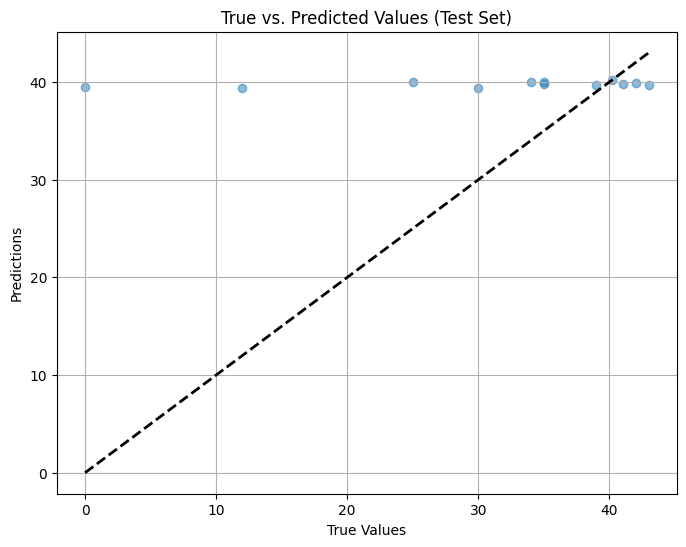

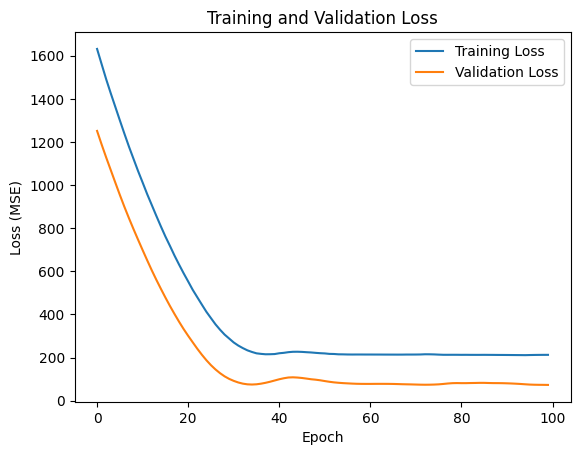

In [ ]:
# prompt: plot training and testing result

import matplotlib.pyplot as plt

# Assuming you have your test predictions and true test values in the variables 'test_predictions' and 'y_test'
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values (Test Set)')
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# prompt: tune the above model

import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.svm import SVR

# XGBoost Hyperparameter Tuning
X = data[['DBH_m_', 'VH_mean']]
y = data['canopy_cir']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],  # Example subsample parameter
    'colsample_bytree': [0.8, 1.0]  # Example colsample_bytree parameter
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Train with the best parameters
best_xgb_model = xgb.XGBRegressor(**grid_search.best_params_, objective='reg:squarederror', seed=42)
best_xgb_model.fit(X_train, y_train)

# Evaluate the tuned model
train_predictions = best_xgb_model.predict(X_train)
valid_predictions = best_xgb_model.predict(X_valid)
test_predictions = best_xgb_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
valid_mae = mean_absolute_error(y_valid, valid_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Training Mean Squared Error (Tuned XGBoost): {train_mse}')
print(f'Validation Mean Squared Error (Tuned XGBoost): {valid_mse}')
print(f'Testing Mean Squared Error (Tuned XGBoost): {test_mse}')
print(f'Training Mean Absolute Error (Tuned XGBoost): {train_mae}')
print(f'Validation Mean Absolute Error (Tuned XGBoost): {valid_mae}')
print(f'Testing Mean Absolute Error (Tuned XGBoost): {test_mae}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Training Mean Squared Error (Tuned XGBoost): 107.71477805643872
Validation Mean Squared Error (Tuned XGBoost): 85.43230972214103
Testing Mean Squared Error (Tuned XGBoost): 194.16043519965635
Training Mean Absolute Error (Tuned XGBoost): 7.557528856065537
Validation Mean Absolute Error (Tuned XGBoost): 7.963457425435384
Testing Mean Absolute Error (Tuned XGBoost): 9.287023289998372
